import libraries

In [60]:
from dtocs import *
from helper import *
from maps import *
import numpy as np
import matplotlib.pyplot as plt
from gdal_interfaces import GDALTileInterface, GDALInterface


# Setup Data folder and GDAL Interface parameter with tiling)
- dirpath: path to the directory where datasets subfolder is stored
- elevation_path: path to folder containing elevation tiles
- landcover_path: path to folder containing landcover tiles

In [61]:
dirpath = "C:/Users/SAMARTH/Desktop/MTP/mtp/"

elevation_path = dirpath + "elevation"
landcover_path = dirpath + "landcover"
elevation_summary_path = elevation_path + "/elevation_summary.json"
landcover_summary_path = landcover_path + "/landcover_summary.json"

ALWAYS_REBUILD_SUMMARY = False
OPEN_INTERFACES_SIZE = 8

In [62]:
elevation_data_interface = GDALTileInterface(elevation_path, elevation_summary_path, OPEN_INTERFACES_SIZE)
landcover_data_interface = GDALTileInterface(landcover_path, landcover_summary_path, OPEN_INTERFACES_SIZE)

if elevation_data_interface.has_summary_json() and not ALWAYS_REBUILD_SUMMARY:
    print('Re-using existing summary JSON')
    elevation_data_interface.read_summary_json()
else:
    print('Creating summary JSON ...')
    elevation_data_interface.create_summary_json()
    
if landcover_data_interface.has_summary_json() and not ALWAYS_REBUILD_SUMMARY:
    print('Re-using existing summary JSON')
    landcover_data_interface.read_summary_json()
else:
    print('Creating summary JSON ...')
    landcover_data_interface.create_summary_json()

Re-using existing summary JSON
Building spatial index ...
Re-using existing summary JSON
Building spatial index ...


# Bounding box and path dataset filepath
- Add lat1,lon1 and lat2,lon2
- Change resolution
- Add dataset(.tif files) filepath (for GDAL interface (without tiling))

In [63]:
# USA random mountain
# lon1, lat1 = -109.83007049344715, 44.36470033197011
# lon2, lat2 = -109.7513685303535, 44.29673563882564

# India
# lon1, lat1 = 77.28112208857522,32.135432817449384
# lon2, lat2 = 77.62169826045022,31.94918029751246

# Colorado [Whole region]
# lon1, lat1 = -106.72643114729188,38.84785651131714
# lon2, lat2 = -105.95392348402243,39.458493653253676

# Colorado (peak to peak example)
# lat1, lon1 = 38.94374018363843, -106.5759101561709
# lat2, lon2 = 39.04527792014898, -106.38578062842298

# manali (hanuman tibba - manali)
lat1, lon1 = 32.372571, 76.983637
lat2, lon2 = 32.189737, 77.315875

# Sissu Batal  [shape:  623 1986]
# lat1, lon1 = 32.474, 77.110
# lat2, lon2 = 32.306, 77.745

# Khanahr peak (small area testing)  [shape:  65 108]
# lat1, lon1 = 31.801535462745512, 76.97623916145938
# lat2, lon2 = 31.784061604490404, 77.01031292952429

# Griffon peak (small area testing)
# lat1, lon1 = 31.800723508286747, 76.94858578581308
# lat2, lon2 = 31.76176517190518, 76.99510825525397

# palan - sosan  [shape:  2272 3069]
# lat1, lon1 = 32.537047, 76.554121
# lat2, lon2 = 31.924304, 77.535921

# arnehar - mandi  [shape:  52 94]
# lat1, lon1 = 31.778518, 77.013229
# lat2, lon2 = 31.764576, 77.042884

# keylong - tosh
# lat1, lon1 = 32.553983959102354, 76.9572465564983
# lat2, lon2 = 32.02887381373745, 77.50664575756166

# menthosa - sosan
# lat1, lon1 = 32.90954351269039, 76.68373432249861
# lat2, lon2 = 31.863216801377973, 77.67972370282335

resolution = 30

# Generate Matrix
- Using GDAL tile interface

In [64]:
elevation_map, landcover_map = getGrayLevelMatrixFromDataSet(lon1, lat1, lon2, lat2, elevation_data_interface, landcover_data_interface, resolution)

start:  32.372571 76.983637
end:  32.189737 77.315875
shape:  678 1041


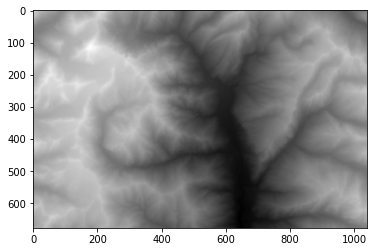

In [65]:
plt.imshow(elevation_map,cmap='gray')
plt.show()

In [42]:
print("Elevation Map Info")
print(f"Gray Map Shape: {elevation_map.shape}")
print(f"Min: {elevation_map.min()}")
print(f"Max: {elevation_map.max()}")

Elevation Map Info
Gray Map Shape: (145, 147)
Min: 844
Max: 1679


<AxesSubplot:>

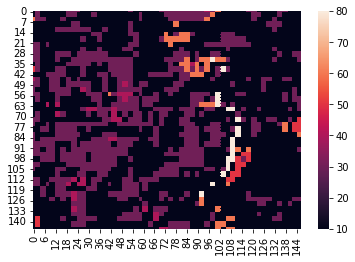

In [43]:
import seaborn as sns
sns.heatmap(landcover_map)

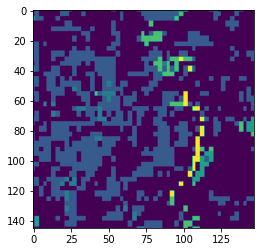

In [44]:
plt.imshow(landcover_map)
plt.show()

Source and Destination

In [66]:
n,m = elevation_map.shape

# USA random
# src_lon,src_lat = -109.81884898177093,44.32480359458633
# des_lon,des_lat = -109.77537406272984,44.30294042398075

# src_lat, src_lon = 38.98065379328955, -106.528761396495
# des_lat, des_lon = 39.02089538747208, -106.42163602957328

# src_lat, src_lon = 32.243724, 77.204016
# src_lat, src_lon = 32.350336, 77.129226

# hanuman tibba
src_lat, src_lon = 32.216951, 77.231191
des_lat, des_lon = 32.341876, 77.040854

# src_lat, src_lon = 31.775167, 77.017773
# des_lat, des_lon = 31.772527, 77.029848

# Khanahr peak (small area testing) 
# src_lat, src_lon = 31.7887873925783, 76.9881056556389
# des_lat, des_lon = 31.79484414912616, 76.99711086936229

# palan
# src_lat, src_lon = 32.369789, 76.766289
# des_lat, des_lon = 32.076790, 77.312516

# Griffon peak from kamand bridge
# src_lat, src_lon = 31.78026039724837, 76.98353775191406
# des_lat, des_lon = 31.77730386806442, 76.96974603761053

# menthosa - sosan
# src_lat, src_lon = 32.80644936709285, 76.82298402202355
# des_lat, des_lon = 32.29517226314917, 77.4885503853536

src_latIdx,src_lonIdx = findIndex(src_lat,src_lon, lat1,lon1, lat2,lon2, resolution)
des_latIdx,des_lonIdx = findIndex(des_lat,des_lon, lat1,lon1, lat2,lon2, resolution)

A* Search Algorithm

In [67]:
# from dijkstra import dijkstraFromSrc, dijkstraFromSrcWithLC, showPathDijkstra
from astar import astarFromSrcWholeBB, astarFromSrcTillDes, showPathAstar

- Whole bounding box

In [47]:
# alpha = 0
# h_weight = 0.1
# slope = 40
# distFromSrc, parentMat  = astarFromSrcWholeBB(elevation_map, landcover_map, src_latIdx, src_lonIdx, des_latIdx, des_lonIdx, alpha, h_weight, resolution, slope)

- Till destination break point

In [68]:
alpha = 0
h_weight = 0.1
slope = 40
distFromSrc, parentMat  = astarFromSrcTillDes(elevation_map, landcover_map, src_latIdx, src_lonIdx, des_latIdx, des_lonIdx, alpha, h_weight, resolution, slope)

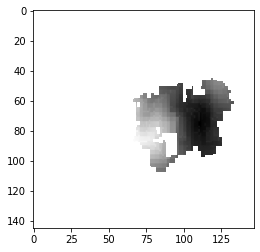

In [49]:
plt.imshow(distFromSrc,cmap='gray')
plt.show()

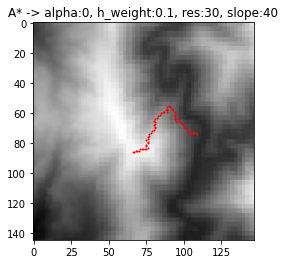

In [50]:
showPathAstar(elevation_map, parentMat, src_latIdx, src_lonIdx, des_latIdx, des_lonIdx, alpha, h_weight, resolution, slope)

Dijkstra

In [69]:
from dijkstra import dijkstraTillDes, showPathDijkstra

In [70]:
alpha = 0
h_weight = 0.1
slope = 40
# distFromSrc, parentMat  = dijkstraFromSrc(elevation_map, src_latIdx, src_lonIdx, resolution)
distFromSrc, parentMat  = dijkstraTillDes(elevation_map, landcover_map, src_latIdx, src_lonIdx, des_latIdx, des_lonIdx, alpha, h_weight, resolution, slope)

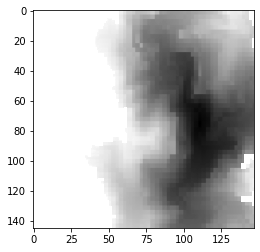

In [53]:
plt.imshow(distFromSrc,cmap='gray')
plt.show()

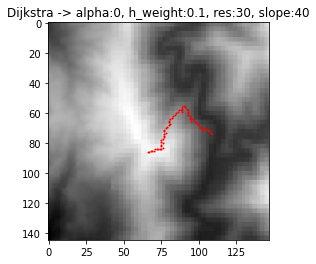

In [54]:
showPathDijkstra(elevation_map, parentMat, src_latIdx, src_lonIdx, des_latIdx, des_lonIdx, alpha, h_weight, resolution, slope)